# Debug notebook for saliency map saving

In [1]:
%load_ext autoreload

### Dataset

In [2]:
%autoreload
import datasets

images, labels, n_classes = datasets.dataset_absolute_position()
train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels = datasets.split_dataset(images, labels)

36 training samples
36 test samples
36 analysis samples


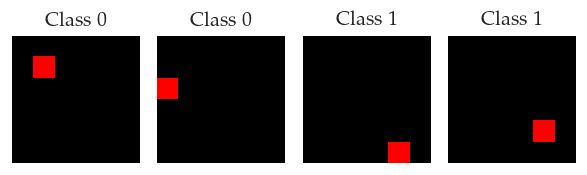

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Palatino"]})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

fig, axs = plt.subplots(1, 4, figsize=(1 + 2 * 2, 2), dpi=120)
j = 0
for c in range(2):
    for i in range(2):
        inds = train_labels == c
        axs[j].imshow(train_images[inds][i].permute((1, 2, 0)))
        axs[j].set_title(f"Class {train_labels[inds][i]}")
        axs[j].axis('off')
        j += 1

plt.tight_layout()
pass

## Model

In [4]:
%autoreload
from toy_models import TriViTalAbsolutePosition

/home/robert-jan/surfdrive/experiments/vit-position-info/toy-experiments/../models/irpe.py:14: UserWarning: [WARNING] The module `rpe_ops` is not built. For better training performance, please build `rpe_ops`.
  warnings.warn(RED_STR.format("[WARNING] The module `rpe_ops` is not built. \


# Training solution

In [5]:
%autoreload
from experiments import run

In [6]:
%autoreload

save_raw = 'absolute_position'

# Train / hybrid
# seeds = range(10)
seeds = [0]
# n_epochs = 4000
n_epochs = 100
report_every_n = 2000
lr = 4e-3
# d = 1
# n_heads = 1
n_classes = 2
pos_emb = 'absolute'
use_rel_pos = False
weight_decays = [1e-3]

# Test these settings
lr = 4e-3
d = 4
n_heads = 2
attribution_method = 'input_gradient_withnegative'

for weight_decay in weight_decays:
    print(f"\n\nWeight decay: {weight_decay}")
    run('absolute_position', seeds, n_epochs, lr, d, n_heads, n_classes, pos_emb, use_rel_pos, train_images, train_labels, test_images, test_labels, analysis_images, analysis_labels, report_every_n=report_every_n, attribution_method=attribution_method, weight_decay=weight_decay, save_raw=save_raw)



Weight decay: 0.001
Epoch 0: 0.7141404151916504
Epoch 99: 0.6115701794624329
Accuracy: 0.9166666865348816
Saved saliency maps to ./toy_saliency_maps/absolute_position_0.pt
Sorting by appearance for these groups of classes:  [range(0, 2)]

Without bias:
appearance (all): 2.67 +- 0.00 (2.67)
appearance (c0) : 0.83 +- 0.00 (0.83)
appearance (c1) : 4.51 +- 0.00 (4.51)
position (all): 97.33 +- 0.00 (97.33)
position (c0) : 99.17 +- 0.00 (99.17)
position (c1) : 95.49 +- 0.00 (95.49)

With bias:
bias (all): 69.97 +- 0.00 (69.97)
bias (c0) : 71.78 +- 0.00 (71.78)
bias (c1) : 68.15 +- 0.00 (68.15)
appearance (all): 0.84 +- 0.00 (0.84)
appearance (c0) : 0.24 +- 0.00 (0.24)
appearance (c1) : 1.44 +- 0.00 (1.44)
position (all): 29.20 +- 0.00 (29.20)
position (c0) : 27.98 +- 0.00 (27.98)
position (c1) : 30.42 +- 0.00 (30.42)



/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/robert-jan/miniconda3/envs/vit/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Load raw attributions

In [7]:
%autoreload

# import sys
# import os
# sys.path.append(os.path.abspath('..'))
# sys.path.append(os.path.abspath('.'))
from analysis import load_raw_attributions


filepath = f"./toy_saliency_maps/absolute_position_0.pt"
raw_attributions = load_raw_attributions(filepath)

In [8]:
# Structure of the attributions
print(raw_attributions.keys())
print(raw_attributions['images'].shape)
print(raw_attributions['labels'].shape)
print(raw_attributions['saliency'].keys())
print(len(raw_attributions['saliency']['image']), raw_attributions['saliency']['image'][0].shape)
print(len(raw_attributions['saliency']['image']), raw_attributions['saliency']['bias'][0].shape)
print(len(raw_attributions['saliency']['image']), raw_attributions['saliency']['pos_emb'][0].shape)

dict_keys(['saliency', 'images', 'labels'])
torch.Size([36, 3, 6, 6])
torch.Size([36])
dict_keys(['image', 'bias', 'pos_emb'])
36 torch.Size([3, 6, 6])
36 torch.Size([38])
36 torch.Size([4, 6, 6])


## Visualize

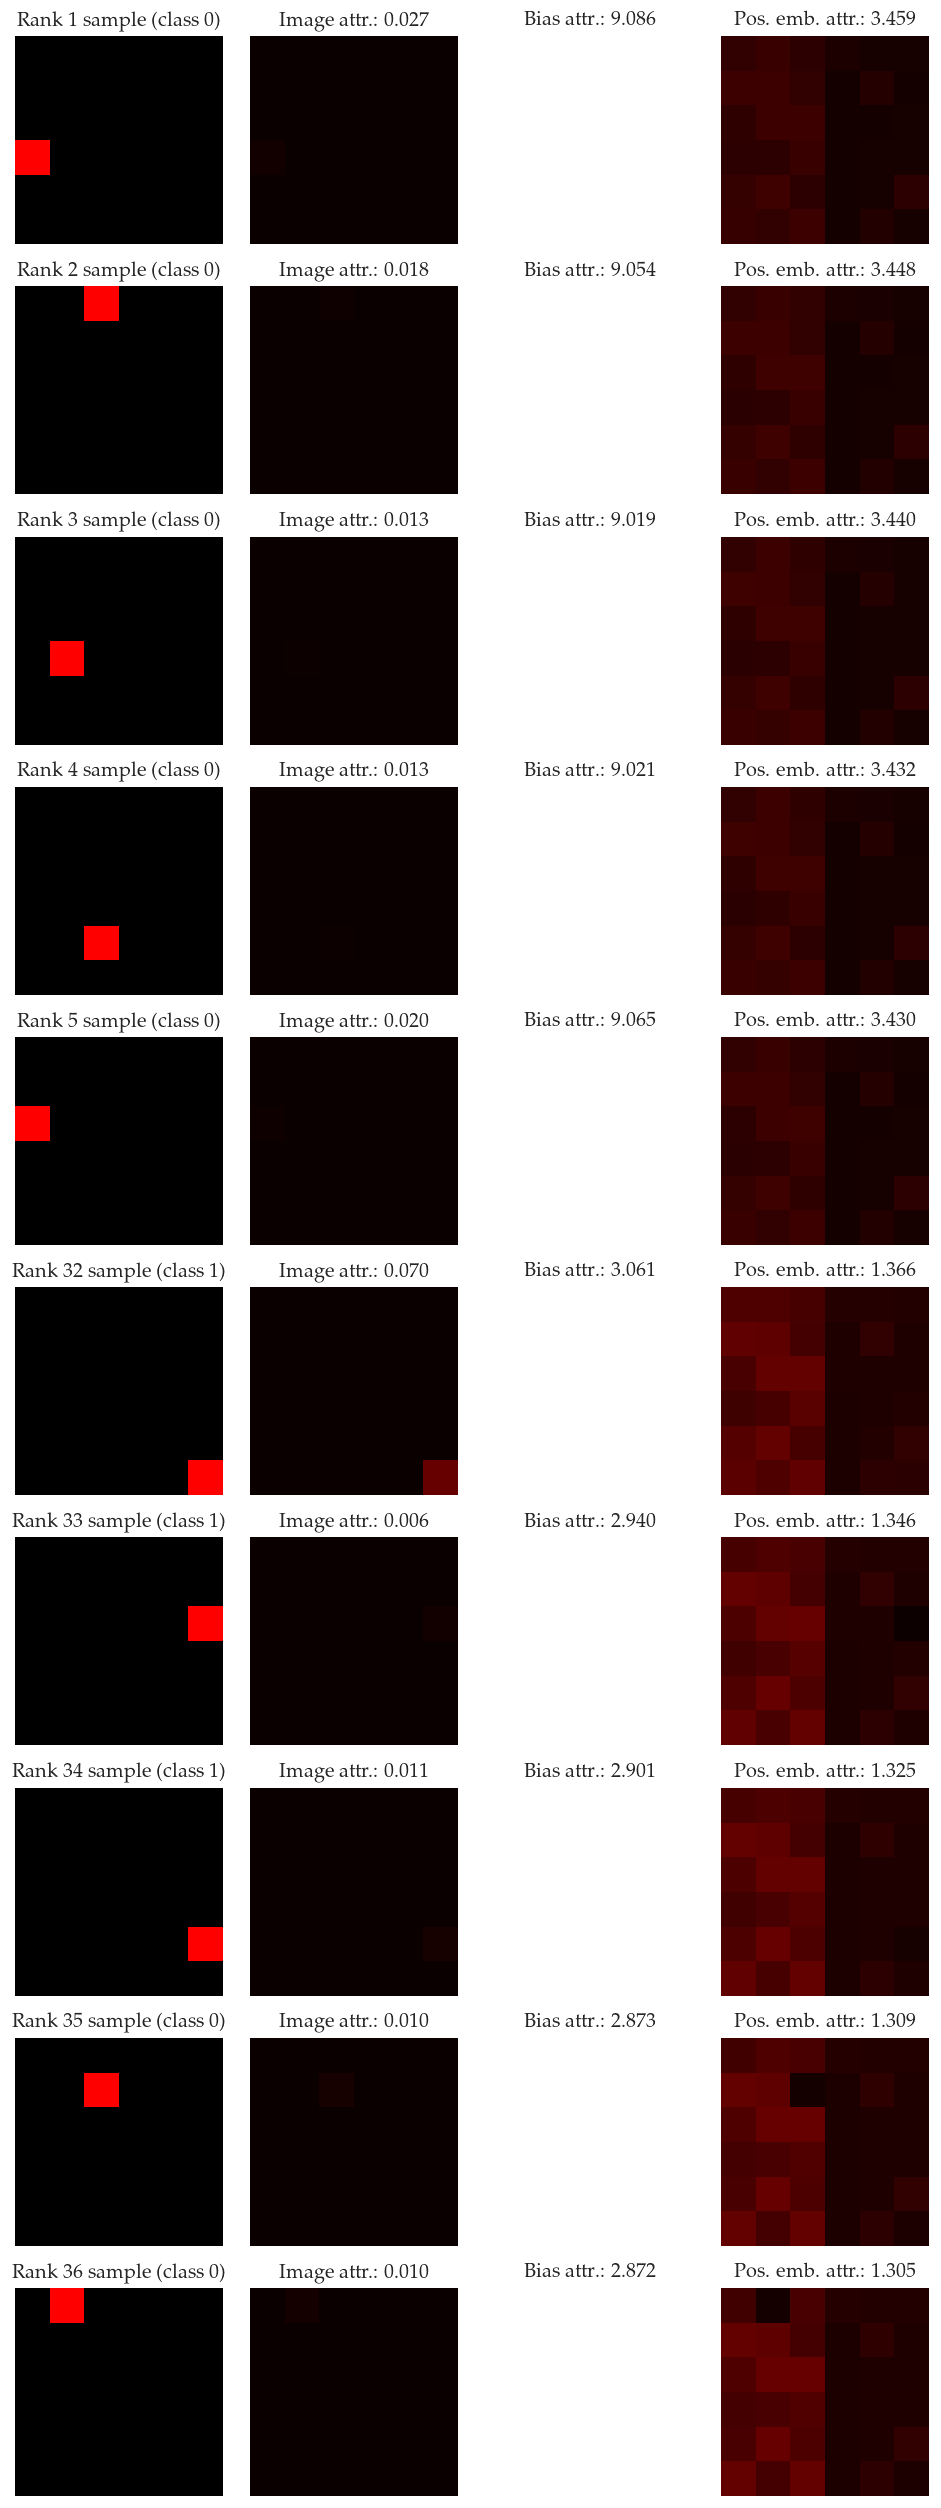

In [9]:
import torch

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn'])
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Palatino"]})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

# Sort all entries by the magnitude of the pos_emb saliency map
# Visualize the top n and bottom n
top_n = 5
bot_n = 5

# Plot
# 1) the image with label as caption,
# 2) the image saliency map, divided by the sum of all saliency maps, with the
# bias saliency divided by all saliency maps in the caption,
# 3) the pos_emb saliency map, divided by the sum of all saliency maps

def smap_postprocessing(smap):
    """Default post-processing for FG: abs()"""
    return smap.abs()

n_samples = len(raw_attributions['images'])

ims_mag = torch.zeros(n_samples, dtype=torch.float32)
bias_mag = torch.zeros(n_samples, dtype=torch.float32)
pos_emb_mag = torch.zeros(n_samples, dtype=torch.float32)
index = []
for i in range(n_samples):
    # Compute saliency maps to compute normalization factor
    im_smap = smap_postprocessing(raw_attributions['saliency']['image'][i])
    bias_smap = smap_postprocessing(raw_attributions['saliency']['bias'][i])
    pos_emb_smap = smap_postprocessing(raw_attributions['saliency']['pos_emb'][i])
    # Remove channel/embedding dimension from image and pos_emb saliency map
    im_smap = im_smap.sum(dim=0)
    pos_emb_smap = pos_emb_smap.sum(dim=0)
    # Compute magnitude of each source
    ims_mag[i] = im_smap.sum()
    bias_mag[i] = bias_smap.sum()
    pos_emb_mag[i] = pos_emb_smap.sum()

    index.append((i, ims_mag[i], bias_mag[i], pos_emb_mag[i]))

index = sorted(index, key=lambda x: x[3], reverse=True)
index = [(r+1, i, ims_mag, bias_mag, pos_emb_mag) for r, (i, ims_mag, bias_mag, pos_emb_mag) in enumerate(index)]

#
# Plot
#

fig, axs = plt.subplots(top_n + bot_n, 4, figsize=(2 * 4, 1 + (top_n + bot_n) * 2), dpi=120)
for i, (r, ind, im_mag, bias_mag, pos_emb_mag) in enumerate(index[:top_n] + index[n_samples - bot_n:]):
    # Post-process saliency maps
    im_smap = smap_postprocessing(raw_attributions['saliency']['image'][ind])
    bias_smap = smap_postprocessing(raw_attributions['saliency']['bias'][ind])
    pos_emb_smap = smap_postprocessing(raw_attributions['saliency']['pos_emb'][ind])
    # Remove channel/embedding dimension from image and pos_emb saliency map
    im_smap = im_smap.sum(dim=0)
    pos_emb_smap = pos_emb_smap.sum(dim=0)
    # Compute norm (after computing magnitude): maximum element
    norm = torch.maximum(im_smap.max(), torch.maximum(bias_smap.max(), pos_emb_smap.max()))
    # Apply norm
    im_smap = im_smap / norm
    bias_smap = bias_smap / norm
    pos_emb_smap = pos_emb_smap / norm

    j = 0
    axs[i,j].imshow(raw_attributions['images'][ind].permute((1, 2, 0)), vmin=0., vmax=1.)
    axs[i,j].set_title(f"Rank {r} sample (class {raw_attributions['labels'][ind]})")
    axs[i,j].axis('off')

    j += 1
    axs[i,j].imshow(im_smap, cmap='hot', vmin=0., vmax=1.)
    axs[i,j].set_title(f"Image attr.: {im_mag:.3f}")
    axs[i,j].axis('off')

    j += 1
    # axs[i,j].imshow(im_smap, cmap='hot')
    axs[i,j].set_title(f"Bias attr.: {bias_mag:.3f}")
    axs[i,j].axis('off')

    j += 1
    axs[i,j].imshow(pos_emb_smap, cmap='hot', vmin=0., vmax=1.)
    axs[i,j].set_title(f"Pos. emb. attr.: {pos_emb_mag:.3f}")
    axs[i,j].axis('off')


plt.tight_layout()
pass